### Assignment 5
#### Natalie Kim

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/xnxk040/Library/CloudStorage/OneDrive-TheUniversityofChicago/machine learning/ml data/radio_songs.csv')

In [3]:
data.head()

,user,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1. Collaborative Filtering
Use this user-item matrix to:

#### A. Recommend 10 songs to users who have listened to 'u2' and 'pink floyd'.
Use item-item collaborative filtering to find songs that are similar using spatial distance with cosine. Since this measures the distance you need to subtract from 1 to get similarity as shown below.

In [4]:
from scipy.spatial.distance import cosine
import numpy as np

In [7]:
# dropping user column then transposing
artists = data.drop(columns = ['user']).T

In [8]:
artists.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
abba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ac/dc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
adam green,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aerosmith,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
afi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# similarity matrix
similarities_matrix = pd.DataFrame(index=artists.index, columns=artists.index)

# original cosine functionality throwing a warning due to all of the 0's in the calculation. Adding small number to avoid division by zero
epsilon = 1e-9 

for artist1 in artists.index:
    for artist2 in artists.index:
        similarities_matrix.loc[artist1, artist2] = 1 - cosine(artists.loc[artist1] + epsilon, artists.loc[artist2] + epsilon)


In [14]:
similarities_matrix.head()

,abba,ac/dc,adam green,aerosmith,afi,air,alanis morissette,alexisonfire,alicia keys,all that remains,...,timbaland,tom waits,tool,tori amos,travis,trivium,u2,underoath,volbeat,yann tiersen
abba,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.141421,0.0,0.0,0.0,0.0,0.0
ac/dc,0.0,1,0.0,0.0,0.223607,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.223607,0.0,0.223607,0.0,0.2,0.0
adam green,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
aerosmith,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
afi,0.0,0.223607,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0


In [40]:
# recommended songs for 'U2'. start with index 1 to avoid 'U2'
similarities_matrix['u2'].sort_values(ascending=False)[1:11]

misfits                 0.5
robbie williams         0.5
green day          0.433013
depeche mode       0.408248
peter fox          0.377964
dire straits       0.353553
madonna            0.353553
johnny cash        0.353553
enter shikari      0.353553
kelly clarkson     0.353553
Name: u2, dtype: object

In [41]:
# recommended songs for 'pink floyd'. start with index 1 to avoid 'pink floyd'
similarities_matrix['pink floyd'].sort_values(ascending=False)[1:11]

genesis                  0.57735
hans zimmer             0.408248
queen                   0.408248
sonic syndicate         0.408248
funeral for a friend    0.408248
led zeppelin            0.408248
david bowie             0.408248
coldplay                0.348155
bob dylan               0.333333
howard shore            0.333333
Name: pink floyd, dtype: object

#### B. Find user most similar to user 1606. Use user-user collaborative filtering with cosine similarity. List the recommended songs for user 1606
(Hint: find the songs listened to by the most similar user).

In [42]:
# similarity matrix - for users
data2 = data.set_index('user')
similarities_matrix_users = pd.DataFrame(index=data2.index, columns=data2.index)

# original cosine functionality throwing a warning due to all of the 0's in the calculation. Adding small number to avoid division by zero 
for user1 in data2.index:
    for user2 in data2.index:
        similarities_matrix_users.loc[user1, user2] = 1 - cosine(data2.loc[user1] + epsilon, data2.loc[user2] + epsilon)

In [48]:
# most similar user
similarities_matrix_users.loc[1606].sort_values(ascending=False)[1:2]

user
1144    0.27735
Name: 1606, dtype: object

In [50]:
# songs of user 1144:
data2.loc[1144][data2.loc[1144] > 0].index.tolist()

['beastie boys',
 'bob dylan',
 'bob marley & the wailers',
 'david bowie',
 'elvis presley',
 'eric clapton',
 'johnny cash',
 'pearl jam',
 'pink floyd',
 'the beatles',
 'the doors',
 'the rolling stones',
 'tom waits']

#### C. How many of the recommended songs has already been listened to by user 1606?

In [51]:
# songs of user 1606
data2.loc[1606][data2.loc[1606] > 0].index.tolist()

['abba', 'elvis presley', 'frank sinatra', 'the beatles']

Two of the songs - Elvis Presley and The Beatles - are already being listened to by user 1606.

#### D. Use a combination of user-item approach to build a recommendation score for each song for each user using the following steps for each user-

1. For each song for the user row, get the top 10 similar songs and their similarity score.
2. For each of the top 10 similar songs, get a list of the user purchases
3. Calculate a recommendation score as follows: Sum (purchaseHistory * similarityScore) divided by sum of similarity score
4. What are the top 5 song recommendations for user 1606?

##### 1. For each song for the user row, get the top 10 similar songs and their similarity score

In [55]:
# initialize empty dictionary to store songs and their top 10 similar songs
top10_songs = {}

In [59]:
# use similarities matrix we created earlier to get the top 10 songs for each song.
for artist in artists.index:
    top10_songs[artist] = similarities_matrix[artist].sort_values(ascending=False)[1:11]

##### 2. For each of the top 10 similar songs, get a list of the user purchases

In [62]:
user_purchases = {}

In [74]:
# for each column, get the list of users that purchased the song
for artist in artists.index:
    user_purchases[artist] = data[artist][data[artist] == 1].index

##### 3. Calculate a recommendation score as follows: Sum of (purchaseHistory * similarityScore) divided by sum of similarity score

In [80]:
recommendation_scores = {}

In [83]:
for user in data2.index:
    user_recs = {}
    
    user_data = data2.loc[user]
    for song in artists.index:
            if user_data[song] == 0:
                top_10_songs = top10_songs[song]
                total_similarity_score = 0
                weighted_purchase_sum = 0
                for similar_song, similarity_score in top_10_songs.items():
                    total_similarity_score += similarity_score
                    weighted_purchase_sum += similarity_score * user_data[similar_song]
                    
                if total_similarity_score > 0:
                    user_recs[song] = weighted_purchase_sum / total_similarity_score
                    
    recommendation_scores[user] = user_recs

##### 4. Top 5 Recommendations for User 1606

In [91]:
sorted(recommendation_scores[1606].items(), key=lambda x: x[1], reverse=True)[:5]

[('eric clapton', 0.20274011653979107),
 ('howard shore', 0.1717486564750787),
 ('david bowie', 0.1712429880663476),
 ('dream theater', 0.1345006252239658),
 ('apocalyptica', 0.10652682767237696)]

#### 2. Conceptual questions

##### 1. Name 2 other similarity measures that you can use instead of cosine similarity above.
Euclidean Distance or Manhattan distance

##### 2. What is needed to build a Content-Based Recommender system?
We need the actual characteristics of the item, however, in order to correctly identify and categorize each of these items we also need subject matter experts to identiy the characteristics of what the items are.

##### 3. Name 2 methods to evaluate your recommender system.
Mean Absolute Error (MAE) and Root Mean Square Error (RMSE)

#### 3. Neural Network using numpy

##### A. Redo the example code in the NN using numpy notebook and recalculate the delta change in weight b2 for
1. different learning rates of 0.0001, 0.01 and 1
2. and for 10 iterations

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

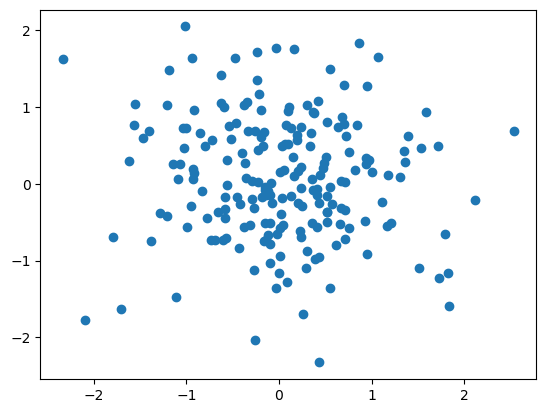

In [120]:
samples = 200
def load_extra_datasets(N):  
    gaussian_quantiles = make_gaussian_quantiles(mean=None, 
                                                 cov=0.7, 
                                                 n_samples=N, 
                                                 n_features=2, 
                                                 n_classes=2,  
                                                 shuffle=True, 
                                                 random_state=None)
    return  gaussian_quantiles

gaussian_quantiles= load_extra_datasets(samples)

X, Y = gaussian_quantiles

X, Y = X.T, Y.reshape(1, Y.shape[0])

#print(Y)
# Visualize the data
plt.scatter(X[0, :], X[1, :]) #, c=Y, s=40);
plt.show()

In [121]:
n_x = X.shape[0] # size of input layer`
n_h = 4
n_y = Y.shape[0] # size of output layer

In [122]:
W1 = np.random.randn(n_h,n_x) * 0.01
b1 = np.zeros(shape=(n_h, 1))
W2 = np.random.randn(n_y,n_h) * 0.01
b2 = np.zeros(shape=(n_y, 1))

In [123]:
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

total_cost = -9999

In [114]:
learning_rate = 0.01
b2_old = b2
print("b2 before=", b2_old)
W1 = W1 - learning_rate * dJdW1
b1 = b1 - learning_rate * dJdb1
W2 = W2 - learning_rate * dJdW2
b2 = b2 - learning_rate * dJdb2

print("b2 after=", b2)

print("delta change=", np.subtract(b2, b2_old))

b2 before= [[0.]]
b2 after= [[4.13173789e-08]]
delta change= [[4.13173789e-08]]


different learning rates of 0.0001, 0.01 and 1

In [128]:
def backpropagation(W1, b1, W2, b2, X, Y, learning_rate):
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2) # Final output prediction
    
    # Compute the cross-entropy cost
    old_total_cost = total_cost
    cost_function = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2)) #J(theta)
    cost = -np.sum(cost_function) / samples
    
    dJdZ2 = A2 - Y
    dJdW2 = (1 / samples) * np.dot(dJdZ2, A1.T)
    dJdb2 = (1 / samples) * np.sum(dJdZ2, axis=1, keepdims=True)
    # since activation function is tanh(Z1) = A1
    # first derivative of d/dz tanh(z) = 1 - tanh(z) ^ 2 = 1 - A1 ^ 2
    dJdZ1 = np.multiply(np.dot(W2.T, dJdZ2), 1 - np.power(A1, 2))
    dJdW1 = (1 / samples) * np.dot(dJdZ1, X.T)
    dJdb1 = (1 / samples) * np.sum(dJdZ1, axis=1, keepdims=True)

    b2_old = b2
    W1 = W1 - learning_rate * dJdW1
    b1 = b1 - learning_rate * dJdb1
    W2 = W2 - learning_rate * dJdW2
    b2 = b2 - learning_rate * dJdb2
    b2_delta = b2-b2_old
    
    return W1, b1, W2, b2, b2_old, b2_delta, cost

In [129]:
# Learning rates and iterations
learning_rates = [0.0001, 0.01, 1]
iterations = 10
results = {}

# Running the experiment
for lr in learning_rates:
    np.random.seed(1)  # for consistent initialization
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    delta_b2_list = []

    for i in range(iterations):
        W1, b1, W2, b2, b2_old, delta_b2, cost = backpropagation(W1, b1, W2, b2, X, Y, lr)
        delta_b2_list.append(delta_b2)

    results[lr] = delta_b2_list

results

{0.0001: [array([[3.98004023e-10]]),
  array([[3.979836e-10]]),
  array([[3.97963177e-10]]),
  array([[3.97942754e-10]]),
  array([[3.97922332e-10]]),
  array([[3.97901911e-10]]),
  array([[3.97881491e-10]]),
  array([[3.9786107e-10]]),
  array([[3.97840651e-10]]),
  array([[3.97820232e-10]])],
 0.01: [array([[3.98004023e-08]]),
  array([[3.95961773e-08]]),
  array([[3.93925027e-08]]),
  array([[3.91893771e-08]]),
  array([[3.8986799e-08]]),
  array([[3.87847669e-08]]),
  array([[3.85832792e-08]]),
  array([[3.83823347e-08]]),
  array([[3.81819316e-08]]),
  array([[3.79820688e-08]])],
 1: [array([[3.98004023e-06]]),
  array([[1.94737566e-06]]),
  array([[4.57323156e-07]]),
  array([[-6.36573483e-07]]),
  array([[-1.44382856e-06]]),
  array([[-2.04636551e-06]]),
  array([[-2.50552377e-06]]),
  array([[-2.86730946e-06]]),
  array([[-3.16633063e-06]]),
  array([[-3.42874716e-06]])]}

##### B. What can you conclude about the effect of the learning rate on the delta change in weight b2?
The smaller the learning rate, the smaller the change between the different b2's. We can see this for learning rate of 0.0001. The changes were the to the order of 10^-10, and it would therefore take a while for this model to converge on an optimum. On the other side, the learning rate of 1 was too big as the jumps were unstable and eventually negative. These larger jumps will likely lead to overshooting and an inability to converge to the optimal weights. With 0.01 being in the middle between these two learning rates, it made sense as it made more moderate jumps that were larger than 0.0001, but without the instability of 1.